Directories size

In [5]:
import os, shutil

train_dir = './dataset/train/glob'
validation_dir = './dataset/val/glob'
test_dir = './dataset/test/glob'
train_glob_red = './dataset/train/glob/red'
train_glob_blue = './dataset/train/glob/blue'
val_glob_red = './dataset/val/glob/red'
val_glob_blue = './dataset/val/glob/blue'
test_glob_red = './dataset/test/glob/red'
test_glob_blue = './dataset/test/glob/blue'
print('total training red images:', len(os.listdir(train_glob_red)))
print('total training blue images:', len(os.listdir(train_glob_blue)))
print('total validation red images:', len(os.listdir(val_glob_red)))
print('total validation blue images:', len(os.listdir(val_glob_blue)))
print('total testing red images:', len(os.listdir(test_glob_red)))
print('total testing blue images:', len(os.listdir(test_glob_blue)))

total training red images: 128
total training blue images: 158
total validation red images: 27
total validation blue images: 33
total testing red images: 29
total testing blue images: 35


Data preprocessing

In [6]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 250

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

Found 286 files belonging to 2 classes.


I0000 00:00:1747736643.551913    1139 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 60 files belonging to 2 classes.
Found 64 files belonging to 2 classes.


Shape of each batch

In [7]:
for data_batch, labels_batch in train_dataset:
 print('data batch shape:', data_batch.shape)
 print('labels batch shape:', labels_batch.shape)
 break

data batch shape: (64, 250, 250, 3)
labels batch shape: (64,)


Viewing first 5 images of the first batch

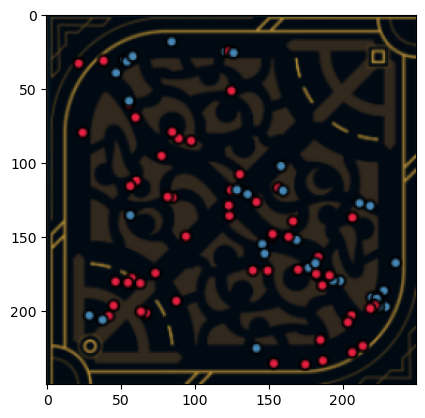

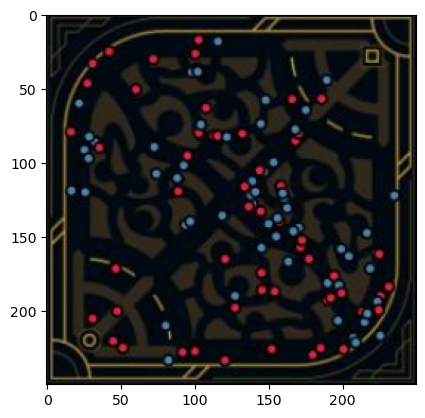

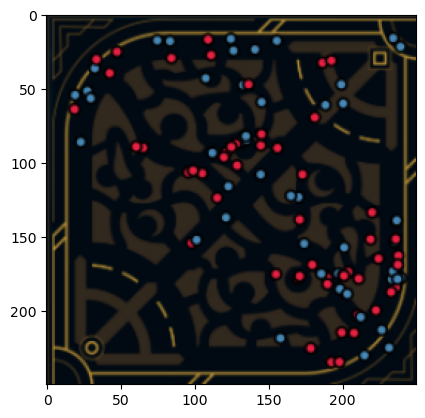

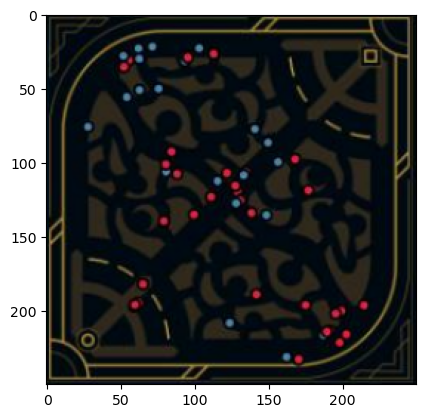

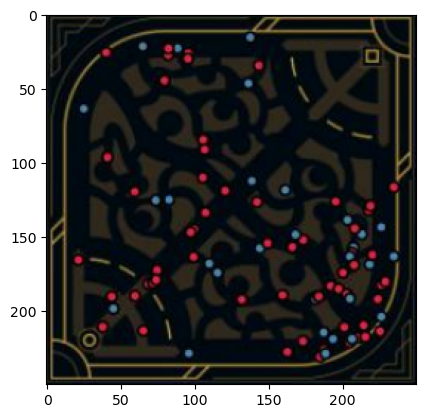

2025-05-20 11:24:06.992605: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
import matplotlib.pyplot as plt

for data_batch, _ in train_dataset.take(1):
 for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

Creating NN

In [9]:
from tensorflow import keras
from keras import layers
from keras import models

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,317,441 (43.17 MB)

 Trainable params: 11,317,441 (43.17 MB)

 Non-trainable params: 0 (0.00 B)

Compiling NN

In [11]:
import tensorflow as tf
model.compile(
 loss='binary_crossentropy',
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

Training the model

In [12]:
history = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset)

Epoch 1/50


I0000 00:00:1747736647.889772   12547 service.cc:152] XLA service 0x7f7528007de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747736647.889835   12547 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-20 11:24:08.019966: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747736648.176253   12547 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/5 ━━━━━━━━━━━━━━━━━━━━ 48s 12s/step - acc: 0.4531 - loss: 0.6919

I0000 00:00:1747736659.393673   12547 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.4945 - loss: 0.6857

2025-05-20 11:24:25.512492: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng58{k2=5,k12=136,k13=1,k14=2,k15=0,k17=137,k18=1,k23=0} for conv %cudnn-conv-bw-filter.4 = (f32[32,3,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,3,250,250]{3,2,1,0} %bitcast.2619, f32[30,32,248,248]{3,2,1,0} %bitcast.3003), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", metadata={op_type="Conv2DBackpropFilter" op_name="gradient_tape/functional_1/conv2d_1/convolution/Conv2DBackpropFilter" source_file="/home/josep/.local/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-05-20 11:24:25.527030: E external/local_xla/xla/service/slow_operation_alarm.cc:140] Th

5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - acc: 0.5080 - loss: 0.6828 - val_acc: 0.5500 - val_loss: 0.6553
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - acc: 0.5400 - loss: 0.6544 - val_acc: 0.5500 - val_loss: 0.6866
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - acc: 0.7299 - loss: 0.6259 - val_acc: 0.5500 - val_loss: 0.7117
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - acc: 0.6632 - loss: 0.6344 - val_acc: 0.7667 - val_loss: 0.5495
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - acc: 0.7436 - loss: 0.5232 - val_acc: 0.8333 - val_loss: 0.4712
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - acc: 0.8065 - loss: 0.4806 - val_acc: 0.8667 - val_loss: 0.4178
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - acc: 0.8320 - loss: 0.4155 - val_acc: 0.8000 - val_loss: 0.4609
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - acc: 0.8562 - loss: 0.3792 - val_acc: 0.8500 - val_loss: 0.3416
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - acc: 0.8358 - loss: 0.3821 - val_

Loss and Accuracy

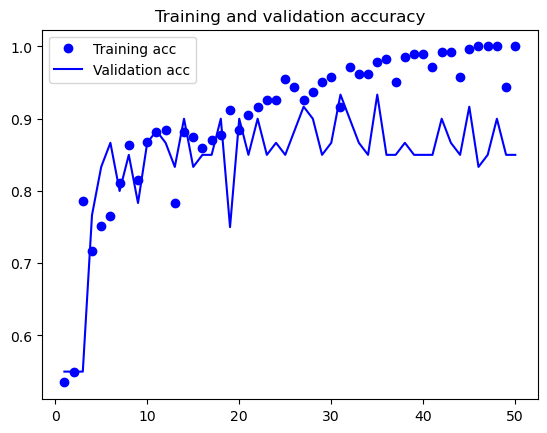

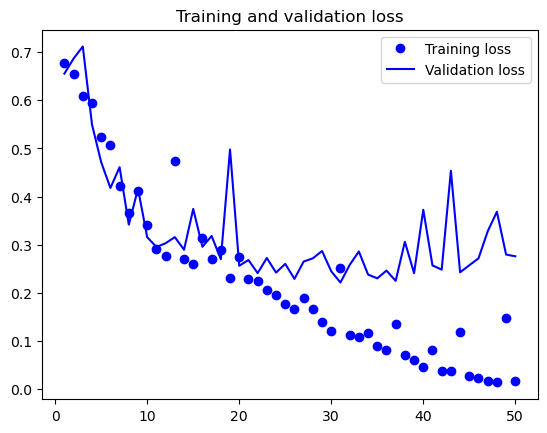

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
